In [297]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

## Chargement des données

In [298]:
import datetime as dt

def dateparse( time_in_secs ):    
    return dt.datetime.fromtimestamp(float(time_in_secs))

In [299]:
T_ext_file = '2.csv'
T_int_file = '3.csv'

In [300]:
df2 = pd.read_csv('./data/'+T_ext_file, header=None, index_col=0, parse_dates=True, \
                 date_parser=dateparse, names=['DateTime', 'T2'])

df1 = pd.read_csv('./data/'+T_int_file, header=None, index_col=0, parse_dates=True, \
                 date_parser=dateparse, names=['DateTime', 'T1']) 

In [301]:
len( df1 )

2959

### resample

In [302]:
df_int = df1.resample('10min').mean().interpolate()
df_ext = df2.resample('10min').mean().interpolate()

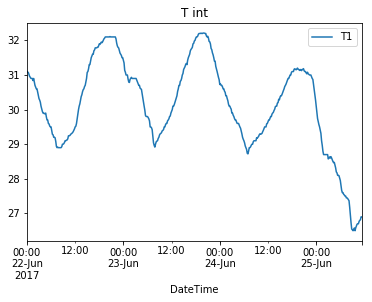

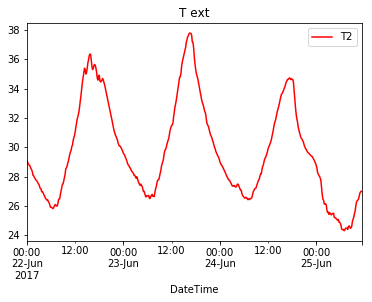

In [303]:
df_int.plot(title='T int')
df_ext.plot(color='r', title='T ext')

In [332]:
# To array :
T_ext = df_ext.as_matrix().flatten()
T_int = df_int.as_matrix().flatten()

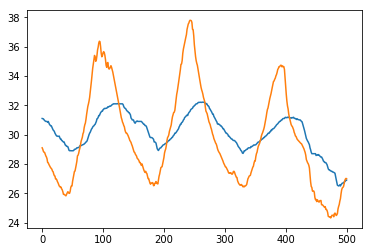

In [333]:
plt.plot( T_int )
plt.plot( T_ext )

## Modèle linéaire

$$
m.C_p \, \frac{dT}{dt} = S.h\,( T - T_{ext} )
$$

Avec $m.Cp$ la masse thermique, $S$ la surface avec l'extérieure et $h$ le coefficient d'échange

On pose:
$$
\beta = \frac{S.h}{m.C_p}
$$

et en pasant par les transformées de Fourier: 
$$
\tilde T = \frac{\beta}{\beta + 2\pi i \, f } \tilde T_{ext}
$$

In [343]:
def model_Text( beta,  T_ext ):
    
    # TF (reel)
    TF_ext = np.fft.rfft( T_ext  )
    freq = np.fft.rfftfreq( T_ext.size, d=1)
    
    freq = freq/( 10*60 )  # resample freq
    
    # modele
    TF_theo = beta/( beta + 2j*np.pi*freq )*TF_ext

    # TF inverse
    T_theo = np.fft.irfft( TF_theo , n=T_ext.size )
    
    return T_theo

In [344]:
from scipy.optimize import fmin

def errorfit( param ):
    T_theo = model_Text( param, T_ext )
    
    return np.sum( (T_int - T_theo)**2 )

In [345]:
errorfit( 80 )

3357.3075913176272

In [337]:
import random

In [338]:
best_fopt = 1e8
best_param = []

for k in range( 60 ):
    beta = random.choice( np.logspace( -5, 0, 30) )
    
    paramZero = beta
    res = fmin(errorfit, paramZero, disp=False, full_output =True)

    paramOpt, fopt = res[:2]
    if best_fopt > fopt:
        best_param = paramOpt
        best_fopt = fopt
        
    
print( best_fopt ) #  best_params )
print( best_param )

707.666047427
[  2.33408817e-05]


/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


In [339]:
## beta : 2.65585250e-05

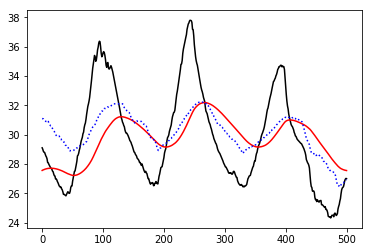

In [341]:
T_theo = model_Text( 2.33e-05, T_ext )

plt.plot(T_ext, 'k')
plt.plot(T_theo, 'r')
plt.plot(T_int, ':b');

$$
beta = \frac{S . h}{ M.Cp }
$$

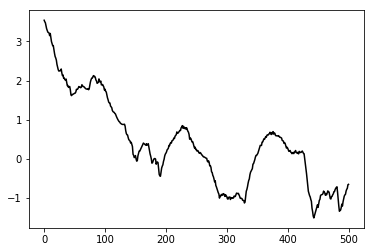

In [342]:
plt.plot(T_int-T_theo, 'k')

In [317]:
print( T_int.mean() )
print( T_ext.mean() )

30.1411793873
29.7433808573
